In [2]:
!pip install geopandas

In [98]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [107]:
import requests
import tempfile
import zipfile

temporary_location = tempfile.gettempdir()
#Méthodes utilisées dans le TP de géopandas
def download_unzip(url, dirname = tempfile.gettempdir(), destname = "borders"):
  myfile = requests.get(url)
  open(dirname + '/' + destname + '.zip', 'wb').write(myfile.content)
  with zipfile.ZipFile(dirname + '/' + destname + '.zip', 'r') as zip_ref:
      zip_ref.extractall(dirname + '/' + destname)

download_unzip('https://www.data.gouv.fr/fr/datasets/r/07b7c9a2-d1e2-4da6-9f20-01a7b72d4b12')
communes_borders = gpd.read_file(temporary_location + "/borders/communes-20190101.json")

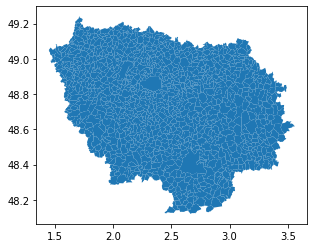

In [109]:
#On indexe par rapport au numéro des départements
#On ne garde que les départements d'IDF'
data_borders = communes_borders.set_index('insee')
data_borders['dep'] = data_borders.index.str[:2]
communes_idf = data_borders.loc[data_borders['dep'].isin(['75','92', '91', '77', '78', '93', '94', '95'])]

In [119]:
amenagements = gpd.read_file("https://www.data.gouv.fr/fr/datasets/r/33d97256-1829-41d3-b7b5-56e490846b85")
#https://www.data.gouv.fr/fr/datasets/amenagements-velo-en-ile-de-france-2/#_

In [6]:
amenagements.head(10)

,ad,ag,revetement,insee_com,nom_com,longueur,highway,osm_id,sens_voit,nv,nom_voie,panneaux,geometry
0,autre chemin velo uni,autre chemin velo uni,fine_gravel,91494,Le Plessis-Pâté,115,footway,436680737.0,NC,hors voirie,None,None,"LINESTRING (2.32423 48.61371, 2.32456 48.61387..."
1,None,None,None,91494,Le Plessis-Pâté,282,unclassified,346994168.0,DOUBLE,z30,Route de Liers,None,"LINESTRING (2.32999 48.61586, 2.32993 48.61578..."
2,None,None,asphalt,91494,Le Plessis-Pâté,254,residential,43106433.0,DOUBLE,z30,Route de Liers,None,"LINESTRING (2.32620 48.61188, 2.32695 48.61158..."
3,None,None,asphalt,91494,Le Plessis-Pâté,160,pedestrian,234021188.0,NC,rue pietonne,Allée des Aubépines,None,"LINESTRING (2.32431 48.61607, 2.32429 48.61610..."
4,None,None,asphalt,91659,Villabé,45,residential,23415855.0,DOUBLE,z30,Passage Agena,None,"LINESTRING (2.46473 48.58547, 2.46417 48.58532)"
5,None,None,None,91659,Villabé,167,residential,23508721.0,UNIQUE,z30,Passage Diadem,None,"LINESTRING (2.46512 48.58851, 2.46535 48.58859..."
6,None,None,asphalt,91659,Villabé,555,residential,76017150.0,DOUBLE,z30,Rue Andromède,None,"LINESTRING (2.46314 48.58935, 2.46396 48.58922..."
7,None,None,asphalt,91659,Villabé,221,residential,23443994.0,DOUBLE,z30,Rue des Fauvettes,None,"LINESTRING (2.45769 48.58497, 2.45781 48.58489..."
8,None,None,None,91659,Villabé,54,residential,23443992.0,UNIQUE,z30,None,None,"LINESTRING (2.45998 48.58366, 2.45995 48.58367..."
9,None,None,None,91659,Villabé,26,residential,23415678.0,UNIQUE,z30,Avenue des Mésanges,None,"LINESTRING (2.45739 48.58511, 2.45730 48.58512..."


In [15]:
amenagements.sort_values(by = 'longueur', ascending = False).head(10)

,ad,ag,revetement,insee_com,nom_com,longueur,highway,osm_id,sens_voit,nv,nom_voie,panneaux,geometry
63182,chemin service site propre uni,chemin service site propre uni,unpaved,77369,Poincy,3987,track,116136274.0,NC,hors voirie,Chemin de Halage,None,"LINESTRING (2.92879 48.96016, 2.92879 48.96017..."
48890,autre chemin velo uni,autre chemin velo uni,None,77244,Larchant,3984,path,223332232.0,NC,hors voirie,None,None,"LINESTRING (2.61523 48.26830, 2.61511 48.26820..."
12861,autre chemin velo uni,autre chemin velo uni,None,77196,Fresnes-sur-Marne,3973,path,140645187.0,NC,hors voirie,Chemin de Halage du Canal de l'Ourcq,None,"LINESTRING (2.71344 48.94474, 2.71396 48.94477..."
3415,chemin service site propre uni,chemin service site propre uni,unpaved,77284,Meaux,3843,track,39166888.0,NC,hors voirie,Chemin de Halage,None,"LINESTRING (2.89882 48.96485, 2.89889 48.96484..."
53596,voie verte uni,voie verte uni,None,78263,Gambais,3762,path,780468425.0,NC,hors voirie,None,FR:C115,"LINESTRING (1.70846 48.79701, 1.70816 48.79687..."
29467,chemin service site propre uni,chemin service site propre uni,None,77191,Fontenailles,3318,track,75636758.0,NC,hors voirie,Route de Valence,None,"LINESTRING (2.91193 48.51359, 2.91193 48.51359..."
13394,piste uni,piste uni,asphalt,78562,Saint-Léger-en-Yvelines,3301,cycleway,705926596.0,NC,hors voirie,None,None,"LINESTRING (1.77854 48.71057, 1.77827 48.71071..."
46797,voie verte uni,voie verte uni,compacted,78418,Montesson,3290,path,229185563.0,NC,hors voirie,Chemin de Halage,None,"LINESTRING (2.11396 48.90509, 2.11416 48.90538..."
55791,piste uni,None,asphalt,78646,Versailles,2961,cycleway,132793139.0,NC,hors voirie,None,None,"LINESTRING (2.11948 48.80103, 2.11942 48.80112..."
46951,piste uni,piste uni,asphalt,78551,Saint-Germain-en-Laye,2951,cycleway,36837424.0,NC,hors voirie,None,None,"LINESTRING (2.05425 48.92370, 2.05438 48.92361..."


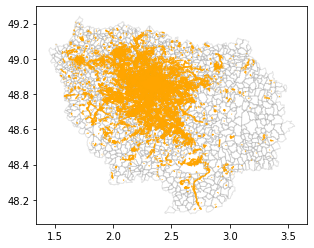

In [122]:
fig, ax = plt.subplots()
communes_idf.plot(ax=ax, color = 'white', edgecolor = 'black', alpha = 0.1)
amenagements.plot(ax=ax, color = 'orange')
plt.show()

In [120]:
amenagements[amenagements['ag']==amenagements['ad']].count()
#là où il y a des pistes pour les deux sens : on ne garde que ça pour faciliter les premières cartes 
pistes = amenagements[amenagements['ag']==amenagements['ad']]
pistes['ad'].unique()

array(['autre chemin velo uni', 'piste uni',
       'chemin service site propre uni', 'voie verte uni', 'bande uni',
       'cheminement trottoir uni', 'voie bus uni', 'chemin dedie uni',
       'piste trottoir uni'], dtype=object)

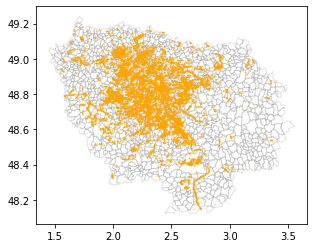

In [123]:
fig, ax = plt.subplots()
communes_idf.plot(ax=ax, color = 'white', edgecolor = 'black', alpha = 0.1)
pistes.plot(ax=ax, color = 'orange')
plt.show()

In [125]:
pistes['ad'].unique()

array(['autre chemin velo uni', 'piste uni',
       'chemin service site propre uni', 'voie verte uni', 'bande uni',
       'cheminement trottoir uni', 'voie bus uni', 'chemin dedie uni',
       'piste trottoir uni'], dtype=object)

In [129]:
#on simplifie les types de pistes
conditionlist = [
                 (pistes['ad'].isin(['chemin service site propre uni','chemin dedie uni','autre chemin velo uni'])), 
                 (pistes['ad'].isin(['cheminement trottoir uni','piste trottoir uni'])),
                 (pistes['ad'].isin(['piste uni'])),
                 (pistes['ad'].isin(['bande uni'])),
                 (pistes['ad'].isin(['voie verte uni'])),
                 (pistes['ad'].isin(['voie bus uni']))]
choicelist = ['voie propre', 'trottoir', 'piste', 'bande', 'voie verte', 'voie bus']
pistes['type'] = np.select(conditionlist, choicelist, default = 'Not Specified')

/usr/local/lib/python3.6/dist-packages/geopandas/geodataframe.py:853: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super(GeoDataFrame, self).__setitem__(key, value)


In [126]:
pistes.count()

ad            25672
ag            25672
revetement    10351
insee_com     25672
nom_com       25672
longueur      25672
highway       25672
osm_id        25672
sens_voit     25672
nv            23854
nom_voie       8224
panneaux        208
geometry      25635
dtype: int64

In [130]:
pisteslong = pistes.sort_values(by = 'longueur', ascending = False).head(10000)
#dans un premier temps on ne garde que les pistes les plus longues

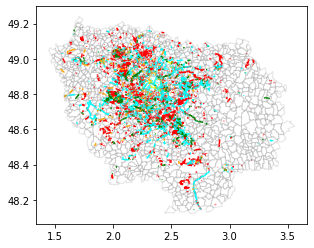

In [131]:
fig, ax = plt.subplots()
communes_idf.plot(ax=ax, color = 'white', edgecolor = 'black', alpha = 0.1)
pisteslong[pisteslong['type'] == 'voie propre'].plot(ax=ax,color = 'red')
pisteslong[pisteslong['type'] == 'piste'].plot(ax=ax, color = 'cyan')
pisteslong[pisteslong['type'] == 'voie verte'].plot(ax=ax, color = 'green')
pisteslong[pisteslong['type'] == 'voie bus'].plot(ax=ax, color = 'yellow')
pisteslong[pisteslong['type'] == 'trottoir'].plot(ax=ax, color = 'grey')
pisteslong[pisteslong['type'] == 'bande'].plot(ax=ax, color = 'orange')
plt.show()

In [ ]:
amenagements['dep'] = amenagements['insee_com'].str[:2]

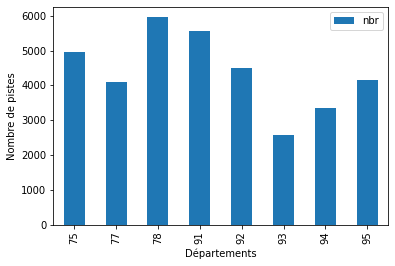

In [184]:
nbr = amenagements.groupby('dep').count()[['ad']]
nbr.rename(columns ={'ad': 'nbr'}, inplace=True)
nbr.sort_values(by ='nbr', ascending = False)
nbr = nbr[nbr['nbr'] > 0]
nbr.plot.bar(xlabel='Départements', ylabel='Nombre de pistes')

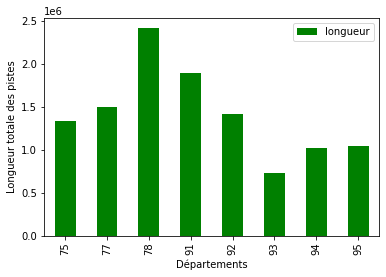

In [183]:
amenagements.groupby('dep').sum()[['longueur']].plot.bar(xlabel = 'Départements', ylabel = 'Longueur totale des pistes', color = 'green')